<a href="https://colab.research.google.com/github/Ryanzaufa/MachineLearningSC/blob/main/04_02_Fire_Ryanza_Aufa_Yansa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


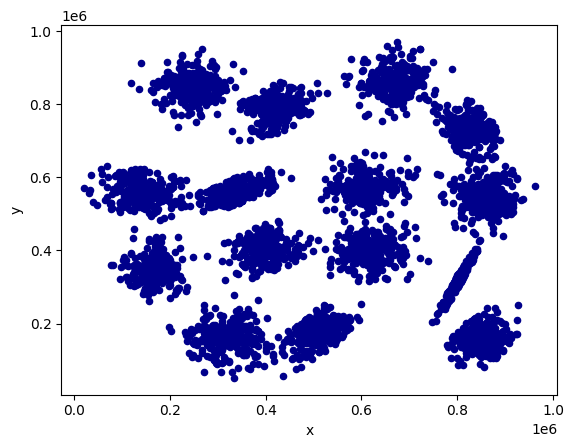

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
help(cluster.KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

2 343184160630744.0
3 213509241036060.34
4 138250712993153.72
5 104935513328366.25
6 79769015011631.75
7 64193292847181.68
8 48146924629521.43
9 41043318712272.94
10 34656578017810.223
11 28620286651244.234
12 23146652003743.793
13 18272685386668.312
14 13486768156952.305
15 8917615616867.258
16 8654195380138.777
17 8441096512802.004
18 8202794901187.82
19 8005075161301.373


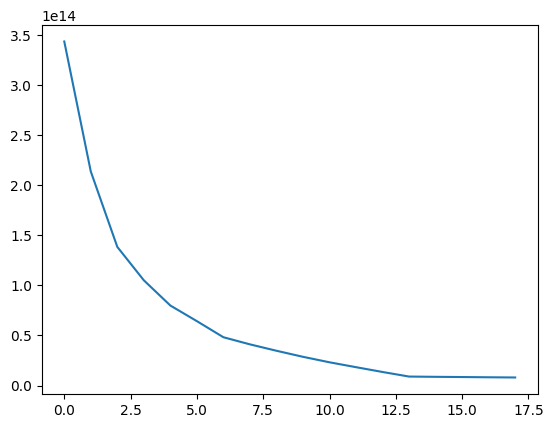

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas
#START CODE
wcss = []
cluster_list = list(np.arange(2, 20))

for k in cluster_list:
  kmeans = cluster.KMeans(n_clusters = k, init = 'k-means++', max_iter = 500, n_init=10, random_state = 1)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
  print(k,kmeans.inertia_)
#END CODE
plt.plot(wcss)


In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
kmeans = cluster.KMeans(n_clusters=15, init = 'k-means++', max_iter = 500, n_init=10, random_state = 1)
kmeans.fit(data)
label = kmeans.labels_
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = label
result.head()

#result['cluster'].value_counts()
#END CODE

,x,y,cluster
0,664159,550946,6
1,665845,557965,6
2,597173,575538,6
3,618600,551446,6
4,635690,608046,6


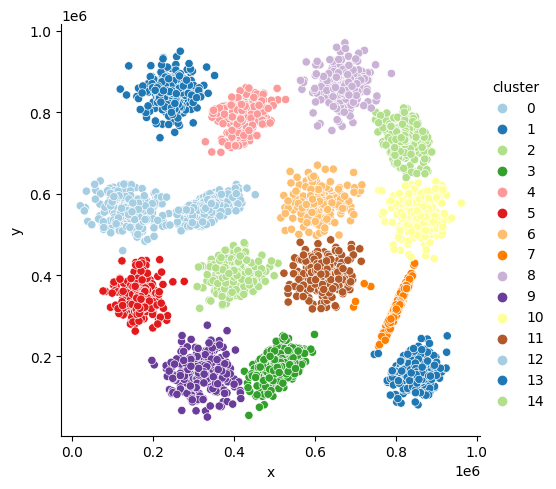

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns
#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', data=result, hue='cluster', palette='Paired')
#END CODE